In [67]:
import os
import datetime
import pytz

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from scipy.signal import find_peaks

In [68]:
def is_gzip_file(filepath):
    with open(filepath, 'rb') as f:
        return f.read(2) == b'\x1f\x8b'

In [69]:
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['axes.grid'] = False
all_cols = ['Grid Feed In', 'External Energy Supply', 'Internal Power Supply', 'Current Power', 'Self Consumption', 'Ambient Temperature', 'Module Temperature', 'Total Irradiation']

In [70]:
csv_path = tf.keras.utils.get_file(
    origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/export_device_1_basic_aggregated_15minutes.csv.gz')
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/export_device_1_basic_aggregated_1hour.csv.gz')
csv_path

2918035/2918035 ━━━━━━━━━━━━━━━━━━━━ 62s 21us/step


'C:\\Users\\ASUS\\.keras\\datasets\\export_device_1_basic_aggregated_15minutes.csv.gz'

In [71]:
if is_gzip_file(csv_path):
  # Read the data directly into a pandas DataFrame
  df = pd.read_csv(csv_path, compression='gzip')
else:
  # Read the data without compression
  df = pd.read_csv(csv_path)

row_count = df.shape[0]
print(f"Total rows: {row_count}")
df.head(5)

Total rows: 125537


,Datetime,Grid Feed In,External Energy Supply,Internal Power Supply,Current Power,Self Consumption,Ambient Temperature,Module Temperature,Total Irradiation,is_weekend
0,2021-11-06 11:00:00,9080.8,0.0,37015.066667,46095.866667,37015.066667,30.046667,57.706667,79.340000,True
1,2021-11-06 11:15:00,9427.4,1.6,37756.825000,47184.225000,37756.825000,30.140833,58.147500,80.698333,True
2,2021-11-06 11:30:00,11218.2,258.0,36041.425000,47259.625000,36041.425000,30.385833,57.361667,81.116667,True
3,2021-11-06 11:45:00,14011.4,0.0,33460.216667,47471.616667,33460.216667,31.025833,57.097500,80.676667,True
4,2021-11-06 12:00:00,11030.2,0.0,38093.108333,49123.308333,38093.108333,31.340000,56.047500,81.843333,True


In [72]:
if df.get('Datetime') is not None:
    # Ensure timestamp column is datetime type
    if df.index.dtype != 'datetime64[ns]':
        df.index = pd.to_datetime(df['Datetime'])
        df.pop('Datetime')
        
    print(df.index.year.unique())
    print(df.index.year.value_counts())

Index([2021, 2022, 2023, 2024, 2025], dtype='int32', name='Datetime')
Datetime
2024    35136
2023    35040
2022    35040
2025    14989
2021     5332
Name: count, dtype: int64


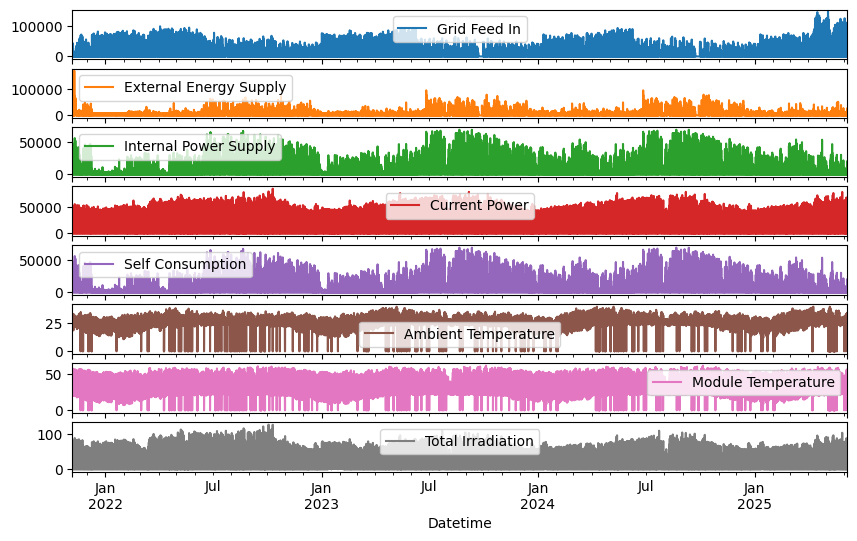

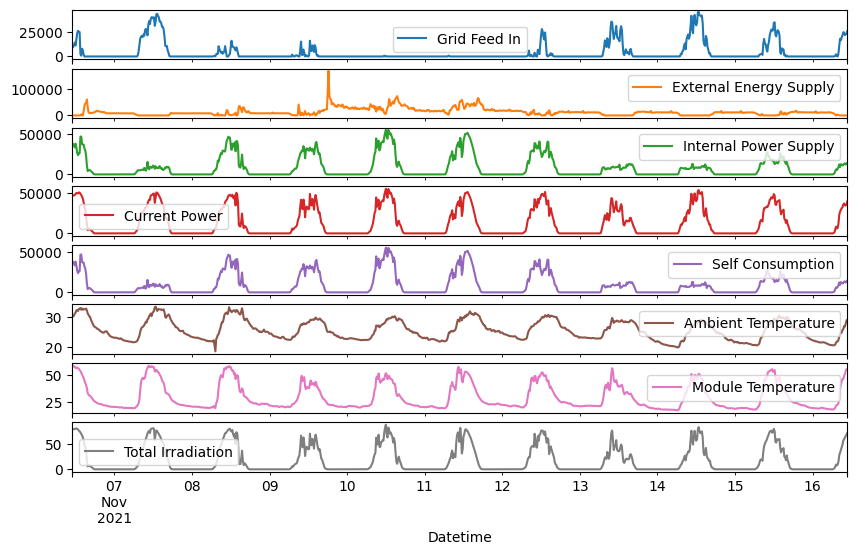

In [73]:
plot_cols = all_cols
plot_features = df[plot_cols]
plot_features.index = df.index
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:960]
plot_features.index = df.index[:960]
_ = plot_features.plot(subplots=True)

In [16]:
# List of columns to check for zeros
zero_columns = [col for col in all_cols]

# Check which columns actually exist in the dataframe
valid_columns = [col for col in zero_columns if col in df.columns]
if len(valid_columns) != len(zero_columns):
    missing = set(zero_columns) - set(valid_columns)
    print(f"Warning: Some columns not found: {missing}")

mask_zeros = df[valid_columns].eq(0).all(axis=1)
zero_rows = df[mask_zeros].copy()
zero_rows

,Grid Feed In,External Energy Supply,Internal Power Supply,Current Power,Self Consumption,Ambient Temperature,Module Temperature,Total Irradiation,is_weekend
Datetime,,,,,,,,,
2022-07-23 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2022-07-23 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2022-07-23 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2022-07-23 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2022-07-23 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...
2024-07-26 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2024-07-26 06:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2024-07-26 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


Text(0, 0.5, 'Current Power')

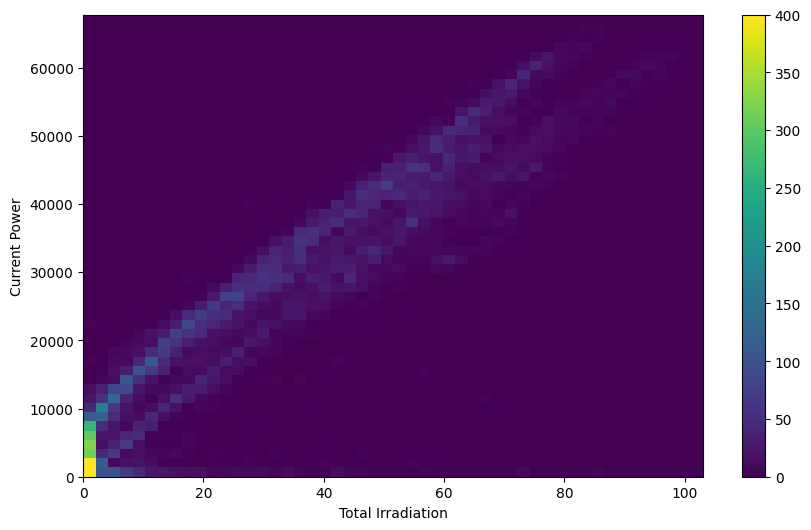

In [18]:
plt.hist2d(df['Total Irradiation'], df['Current Power'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Total Irradiation')
plt.ylabel('Current Power')

Text(0, 0.5, 'Current Power')

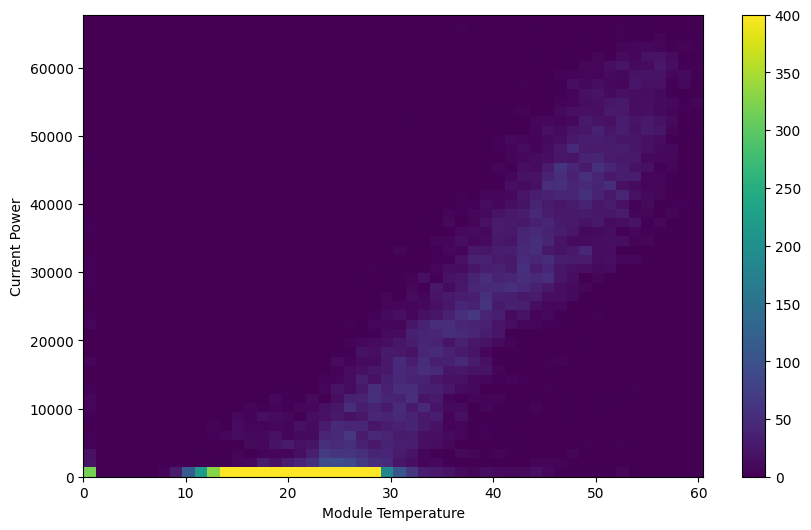

In [19]:
plt.hist2d(df['Module Temperature'], df['Current Power'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Module Temperature')
plt.ylabel('Current Power')

Text(0, 0.5, 'Self Consumption')

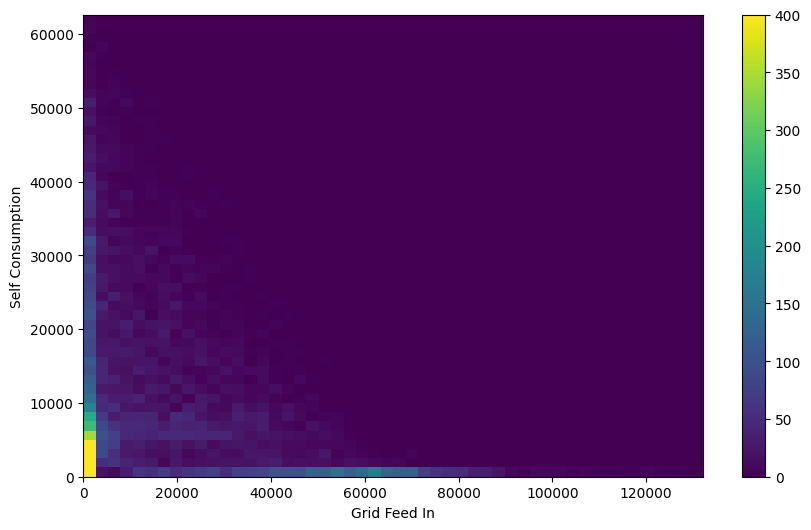

In [20]:
plt.hist2d(df['Grid Feed In'], df['Self Consumption'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Grid Feed In')
plt.ylabel('Self Consumption')

In [21]:
timestamp_s = df.index.map(pd.Timestamp.timestamp)
timestamp_s

Index([1636196400.0, 1636200000.0, 1636203600.0, 1636207200.0, 1636210800.0,
       1636214400.0, 1636218000.0, 1636221600.0, 1636225200.0, 1636228800.0,
       ...
       1749146400.0, 1749150000.0, 1749153600.0, 1749157200.0, 1749160800.0,
       1749164400.0, 1749168000.0, 1749171600.0, 1749175200.0, 1749178800.0],
      dtype='float64', name='Datetime', length=31385)

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Grid Feed In,31385.0,8513.892997,17306.132993,0.0,0.000000,0.000000,7387.200000,132140.307692
External Energy Supply,31385.0,5938.457118,6018.065186,0.0,86.555256,6511.200000,8088.000000,95312.861538
Internal Power Supply,31385.0,5306.420075,9876.661539,0.0,0.000000,0.000000,6280.751282,62600.441860
Current Power,31385.0,12654.937194,17547.187468,0.0,0.000000,309.200000,24822.541026,67764.166667
Self Consumption,31385.0,5306.420075,9876.661539,0.0,0.000000,0.000000,6280.751282,62600.441860
Ambient Temperature,31385.0,25.658336,5.448226,0.0,23.150000,25.766667,29.190000,39.510909
Module Temperature,31385.0,29.565478,11.917668,0.0,21.855224,25.453590,38.455952,60.466667
Total Irradiation,31385.0,15.520645,23.581650,0.0,0.000000,0.002051,27.515090,103.062660


In [23]:
day = 24*60*60
year = (365.2425)*day
df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Total data points 31385
Total data points in a day 96.0


Text(0.5, 1.0, 'Time of day signal')

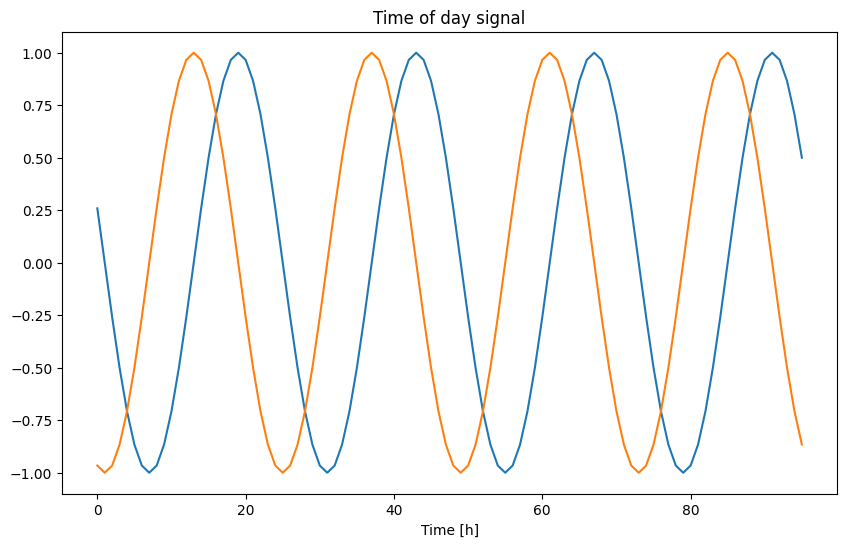

In [24]:
print(f"Total data points {len(df)}")
print(f"Total data points in a day {24*60/15}")

plt.plot(np.array(df['Day sin'])[:96])
plt.plot(np.array(df['Day cos'])[:96])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [25]:
def manual_rfftfreq(n_samples, d):
    """
    Manual implementation of np.fft.rfftfreq()
    
    Parameters:
    n_samples (int): Number of samples in the original time domain signal
    d (float): Sample spacing (time between samples) in seconds
    
    Returns:
    numpy array: Array of frequencies corresponding to FFT output
    """
    # Calculate the sample rate (samples per second)
    sample_rate = 1.0 / d
    
    # For real FFT, we get n//2 + 1 frequency bins (including DC component)
    num_freq_bins = n_samples // 2 + 1
    
    # Calculate frequency increment between bins
    freq_increment = sample_rate / n_samples
    
    # Generate frequencies from 0 to Nyquist frequency
    frequencies = np.arange(num_freq_bins) * freq_increment
    
    return frequencies

# Example usage:
n_samples = len(df['Current Power'])
sample_period = 15 * 60  # 15 minutes in seconds

# Manual calculation
manual_frequencies = manual_rfftfreq(n_samples, sample_period)
manual_frequencies[-1]

np.float64(0.0005555378542474289)

In [26]:
# Verify against NumPy's implementation
numpy_frequencies = np.fft.rfftfreq(n_samples, d=sample_period)

# Compare the first few values
print("Manual calculation:", manual_frequencies[:5])
print("NumPy calculation :", numpy_frequencies[:5])

Manual calculation: [0.00000000e+00 3.54026163e-08 7.08052325e-08 1.06207849e-07
 1.41610465e-07]
NumPy calculation : [0.00000000e+00 3.54026163e-08 7.08052325e-08 1.06207849e-07
 1.41610465e-07]


In [27]:
# Find peaks manually
def find_peaks_manual(x, min_prominence_ratio=0.01):
    peaks = []
    for i in range(1, len(x)-1):
        if x[i] > x[i-1] and x[i] > x[i+1]:
            peaks.append(i)

    print(peaks)
    
    max_val = x.max()
    threshold = max_val * min_prominence_ratio
    peaks = [p for p in peaks if x[p] > threshold]
    
    return np.array(peaks)

In [28]:
fft = tf.signal.rfft(df['Current Power'])
max_val = np.abs(fft).max()
f_per_dataset = np.arange(0, len(fft))
years_per_dataset = n_samples/(sample_period)

f_per_year = f_per_dataset/years_per_dataset

In [29]:
# Get amplitude spectrum
amplitude_spectrum = np.abs(fft.numpy())  # Convert to NumPy array

# Find the peaks
peaks = find_peaks_manual(amplitude_spectrum)
# Convert peak indices to frequencies
peak_frequencies = f_per_year[peaks]

[4, 7, 11, 13, 15, 18, 21, 25, 28, 32, 36, 39, 43, 47, 50, 54, 57, 60, 63, 69, 71, 75, 78, 80, 82, 86, 89, 91, 93, 97, 99, 103, 107, 109, 111, 115, 118, 122, 125, 128, 132, 136, 138, 142, 145, 147, 150, 154, 157, 161, 164, 168, 172, 178, 180, 182, 184, 190, 193, 196, 202, 204, 208, 210, 216, 218, 220, 222, 225, 228, 231, 233, 237, 241, 243, 247, 250, 252, 254, 256, 258, 260, 262, 265, 269, 273, 275, 279, 282, 284, 286, 288, 290, 297, 300, 304, 306, 309, 314, 318, 320, 323, 325, 327, 329, 334, 336, 338, 340, 344, 347, 351, 353, 355, 357, 360, 362, 366, 368, 372, 376, 379, 382, 384, 386, 391, 393, 396, 399, 403, 405, 407, 409, 411, 413, 415, 417, 422, 426, 429, 431, 435, 437, 439, 441, 444, 449, 451, 454, 456, 460, 463, 470, 472, 476, 480, 482, 484, 487, 492, 494, 500, 502, 505, 507, 512, 516, 519, 521, 526, 528, 531, 533, 535, 537, 540, 544, 546, 551, 554, 559, 561, 565, 567, 569, 573, 575, 581, 586, 589, 592, 595, 598, 601, 603, 609, 611, 615, 619, 622, 624, 626, 628, 630, 633, 638, 64

In [30]:
# Convert frequencies to periods
peak_periods = 1 / peak_frequencies

# Sort peaks by amplitude
sorted_indices = np.argsort(-amplitude_spectrum[peaks])
peaks = peaks[sorted_indices]
peak_frequencies = peak_frequencies[sorted_indices]
peak_periods = peak_periods[sorted_indices]

# Show results (top 5 peaks)
for i, (freq, period) in enumerate(zip(peak_frequencies[:5], peak_periods[:5])):
    print(f"Peak {i+1}: Frequency = {freq:.4f} cycles/year")
    
    # Convert to more intuitive units
    days = period * 365.25
    if days < 1:
        print(f"    Period ≈ {days*24:.2f} hours")
    elif days < 30:
        print(f"    Period ≈ {days:.2f} days")
    else:
        print(f"    Period ≈ {period*12:.2f} months")

Peak 1: Frequency = 37.5084 cycles/year
    Period ≈ 9.74 days
Peak 2: Frequency = 74.9881 cycles/year
    Period ≈ 4.87 days
Peak 3: Frequency = 37.5944 cycles/year
    Period ≈ 9.72 days
Peak 4: Frequency = 112.4964 cycles/year
    Period ≈ 3.25 days
Peak 5: Frequency = 75.1028 cycles/year
    Period ≈ 4.86 days


Text(0.5, 1.0, 'Frequency Spectrum of Current Power with Peak Frequencies')

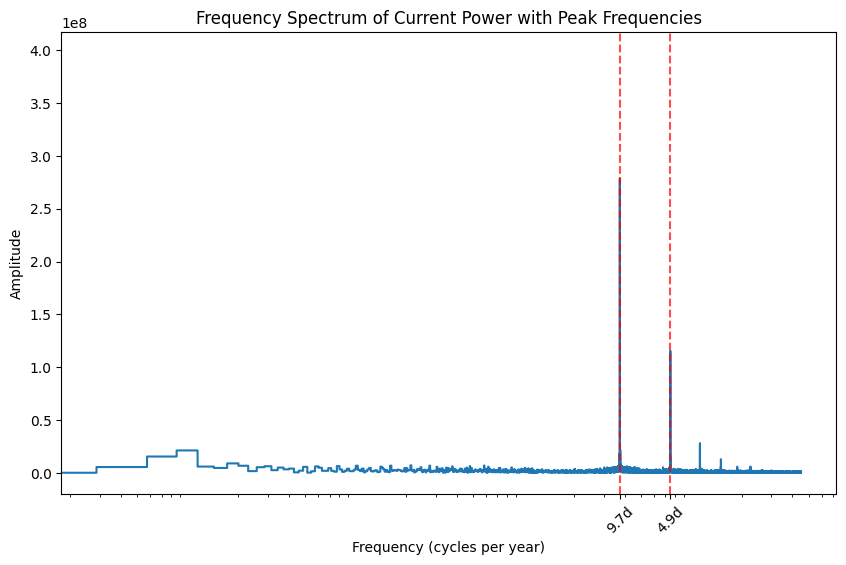

In [31]:
# Get top peaks (assuming you've already calculated them)
top_peaks = peak_frequencies[:2]  # Top 3 peaks

# Create frequency ticks including standard references and top peaks
#tick_locations = [1, 12, 52, 365.2524]  # Standard references (year, month, week, day)
tick_locations = []
tick_locations.extend(top_peaks)  # Add peak frequencies
tick_locations.sort()  # Sort them in ascending order

# Create corresponding labels
tick_labels = []
for freq in tick_locations:
    if abs(freq - 1) < 0.1:
        tick_labels.append('1/Year')
    elif abs(freq - 12) < 0.5:
        tick_labels.append('1/Month')
    elif abs(freq - 52) < 2:
        tick_labels.append('1/Week')
    elif abs(freq - 365.2524) < 10:
        tick_labels.append('1/Day')
    else:
        period_days = (1/freq) * 365.2524
        if period_days < 1:
            tick_labels.append(f'{period_days*24:.1f}h')
        else:
            tick_labels.append(f'{period_days:.1f}d')

plt.step(f_per_year, np.abs(fft))
plt.xscale('log')

# Apply the customized ticks to your plot
plt.xticks(tick_locations, labels=tick_labels, rotation=45)

# Add a vertical line at each peak for emphasis
for freq in top_peaks:
    plt.axvline(x=freq, color='r', linestyle='--', alpha=0.7)

plt.xlabel('Frequency (cycles per year)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum of Current Power with Peak Frequencies')

In [32]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [33]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

[Text(0, 0, 'Grid Feed In'),
 Text(1, 0, 'External Energy Supply'),
 Text(2, 0, 'Internal Power Supply'),
 Text(3, 0, 'Current Power'),
 Text(4, 0, 'Self Consumption'),
 Text(5, 0, 'Ambient Temperature'),
 Text(6, 0, 'Module Temperature'),
 Text(7, 0, 'Total Irradiation'),
 Text(8, 0, 'is_weekend'),
 Text(9, 0, 'Day sin'),
 Text(10, 0, 'Day cos'),
 Text(11, 0, 'Year sin'),
 Text(12, 0, 'Year cos')]

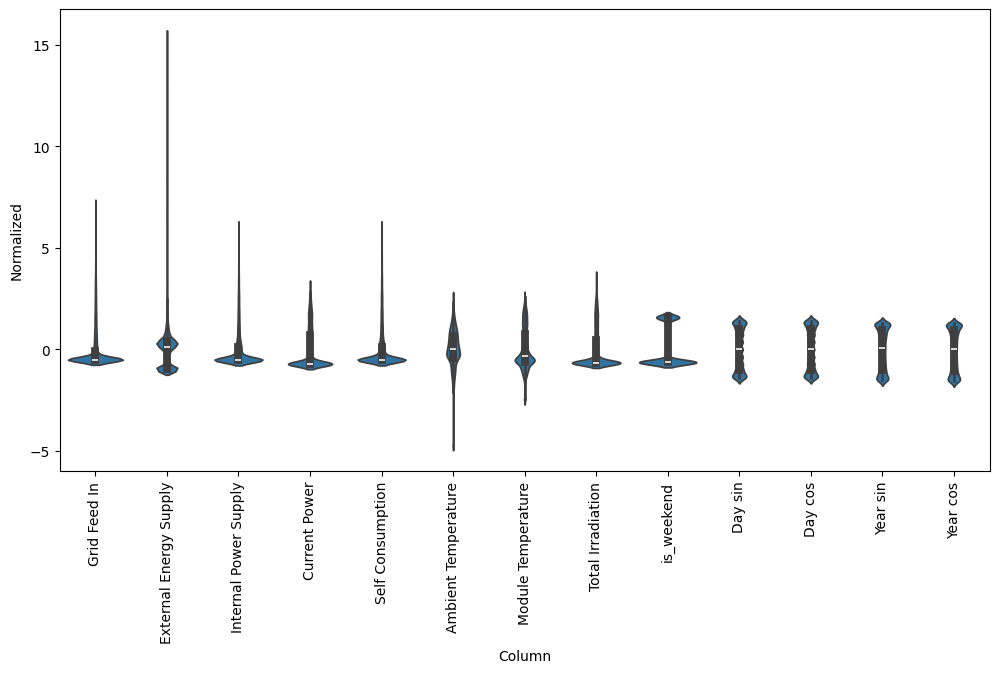

In [34]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
ax.set_xticks(range(len(df.keys())))
ax.set_xticklabels(df.keys(), rotation=90)

In [35]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
    self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack([labels[:, :, self.column_indices[name]] for name in self.label_columns], axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='Current Power', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index], label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index], edgecolors='k', label='Labels', c='#2ca02c', s=64)
        
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions', c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [15min]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

    ds = ds.map(self.split_window)

    return ds
    
  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.train))
      # And cache it for next time
      self._example = result
    return result
  
  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [36]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Current Power'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Current Power']

In [37]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['Current Power'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['Current Power']

In [38]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [39]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 13)
Output shape: (32, 1, 1)


In [40]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [41]:
val_performance = {}
performance = {}

history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val, return_dict=True)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7905 - mean_absolute_error: 0.6612 - val_loss: 0.2451 - val_mean_absolute_error: 0.3741
Epoch 2/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1619 - mean_absolute_error: 0.2975 - val_loss: 0.1415 - val_mean_absolute_error: 0.2721
Epoch 3/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1283 - mean_absolute_error: 0.2587 - val_loss: 0.1342 - val_mean_absolute_error: 0.2607
Epoch 4/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1236 - mean_absolute_error: 0.2517 - val_loss: 0.1320 - val_mean_absolute_error: 0.2566
Epoch 5/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1212 - mean_absolute_error: 0.2479 - val_loss: 0.1303 - val_mean_absolute_error: 0.2539
Epoch 6/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1194 - mean_absolute_error: 0.2454 - val_loss: 0.1298 - val_mean_absolute_error: 0.2524
Epoch 7/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1185 - mean_absolute_error: 0.2435 - v

In [42]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', linear(wide_window.example[0]).shape)

Input shape: (32, 24, 13)
Output shape: (32, 24, 1)


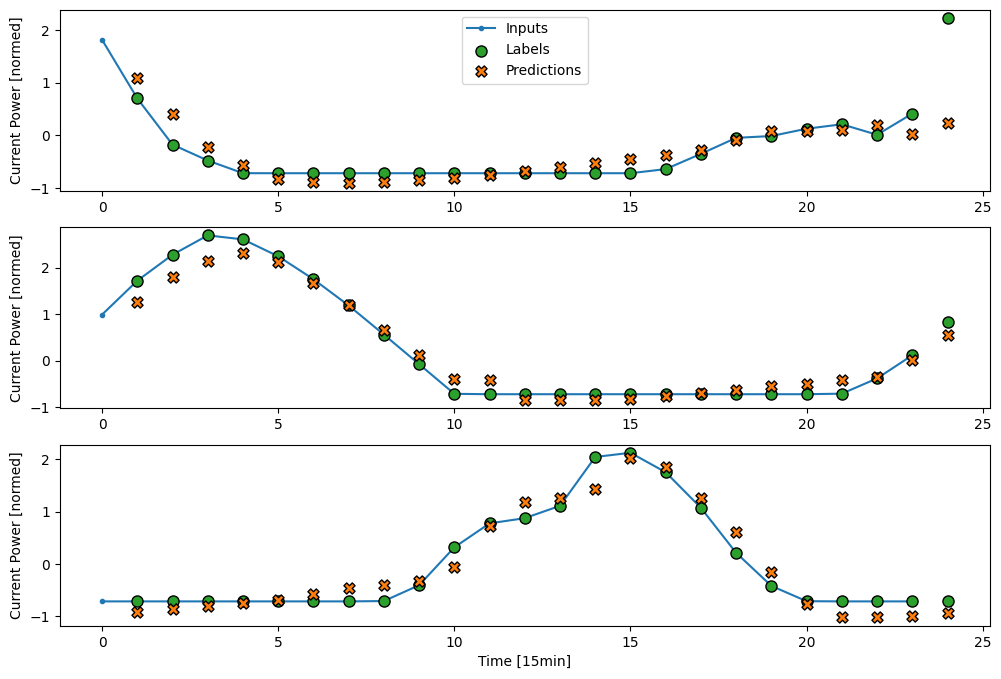

In [43]:
wide_window.plot(linear)

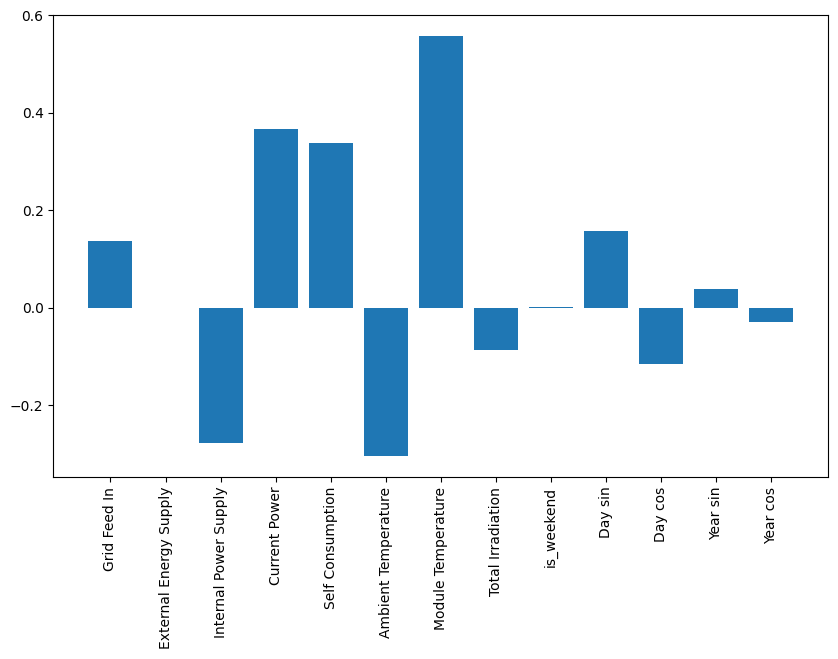

In [44]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [45]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val, return_dict=True)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1088 - mean_absolute_error: 0.1818 - val_loss: 0.0921 - val_mean_absolute_error: 0.1669
Epoch 2/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0784 - mean_absolute_error: 0.1451 - val_loss: 0.0924 - val_mean_absolute_error: 0.1664
Epoch 3/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0754 - mean_absolute_error: 0.1398 - val_loss: 0.0878 - val_mean_absolute_error: 0.1615
Epoch 4/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0747 - mean_absolute_error: 0.1387 - val_loss: 0.0871 - val_mean_absolute_error: 0.1705
Epoch 5/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0727 - mean_absolute_error: 0.1357 - val_loss: 0.0862 - val_mean_absolute_error: 0.1531
Epoch 6/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0719 - mean_absolute_error: 0.1339 - val_loss: 0.0865 - val_mean_absolute_error: 0.1528
Epoch 7/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0715 - mean_absolute_error: 0.1330 - v

In [46]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Current Power'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['Current Power']

Text(0.5, 0.98, 'Given 3 hours of inputs, predict 1 hour into the future.')

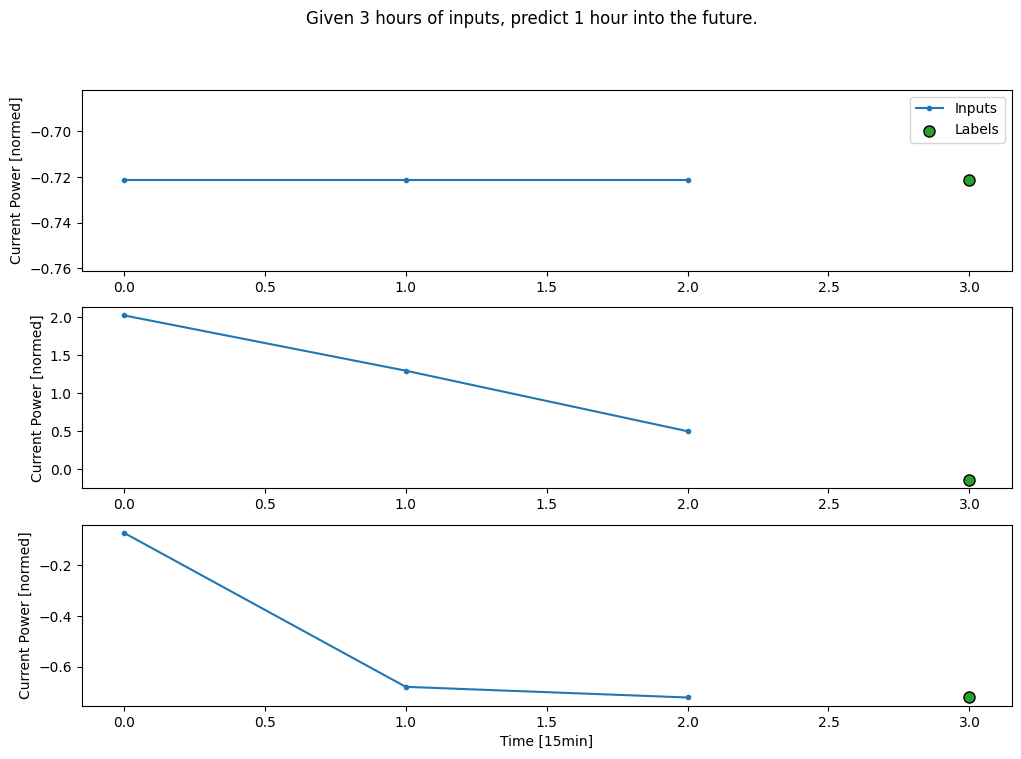

In [47]:
conv_window.plot()
plt.suptitle("Given 3 hours of inputs, predict 1 hour into the future.")

In [48]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [49]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 13)
Output shape: (32, 1, 1)


In [50]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val, return_dict=True)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0, return_dict=True)

197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0852 - mean_absolute_error: 0.1650  


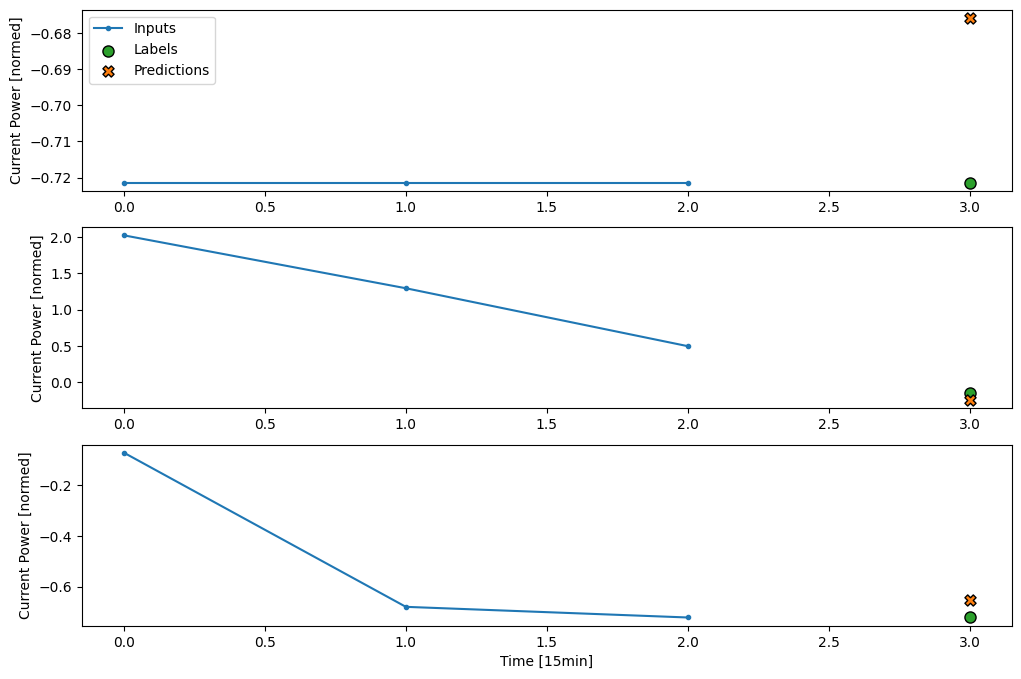

In [51]:
conv_window.plot(multi_step_dense)

In [52]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [53]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 13)
Output shape: (32, 1, 1)


In [54]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val, return_dict=True)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0, return_dict=True)

197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0804 - mean_absolute_error: 0.1459


In [55]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 13)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [56]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Current Power'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['Current Power']

In [57]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 13)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


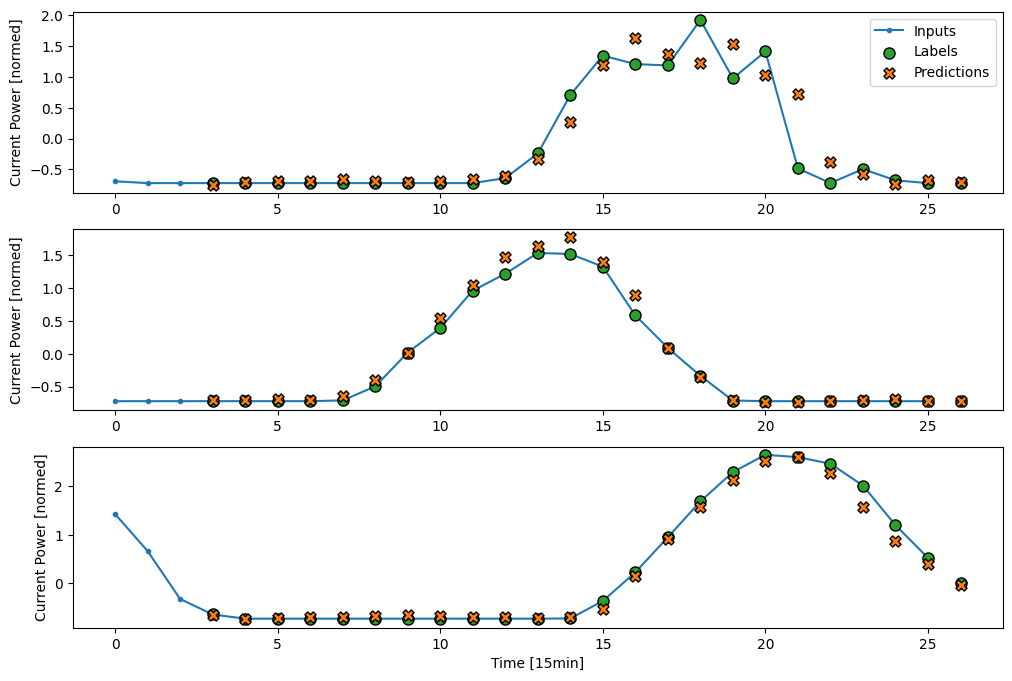

In [58]:
wide_conv_window.plot(conv_model)

In [59]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [60]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 13)
Output shape: (32, 24, 1)


In [61]:
history = compile_and_fit(lstm_model, wide_window)

Epoch 1/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1476 - mean_absolute_error: 0.2203 - val_loss: 0.0906 - val_mean_absolute_error: 0.1660
Epoch 2/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0743 - mean_absolute_error: 0.1377 - val_loss: 0.0836 - val_mean_absolute_error: 0.1511
Epoch 3/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0698 - mean_absolute_error: 0.1281 - val_loss: 0.0810 - val_mean_absolute_error: 0.1451
Epoch 4/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0673 - mean_absolute_error: 0.1238 - val_loss: 0.0800 - val_mean_absolute_error: 0.1426
Epoch 5/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0651 - mean_absolute_error: 0.1215 - val_loss: 0.0806 - val_mean_absolute_error: 0.1452
Epoch 6/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0629 - mean_absolute_error: 0.1196 - val_loss: 0.0796 - val_mean_absolute_error: 0.1434
Epoch 7/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0606 - mean_absolute_error: 0.1175 - v

In [62]:
IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val, return_dict=True)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0, return_dict=True)

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0800 - mean_absolute_error: 0.1424


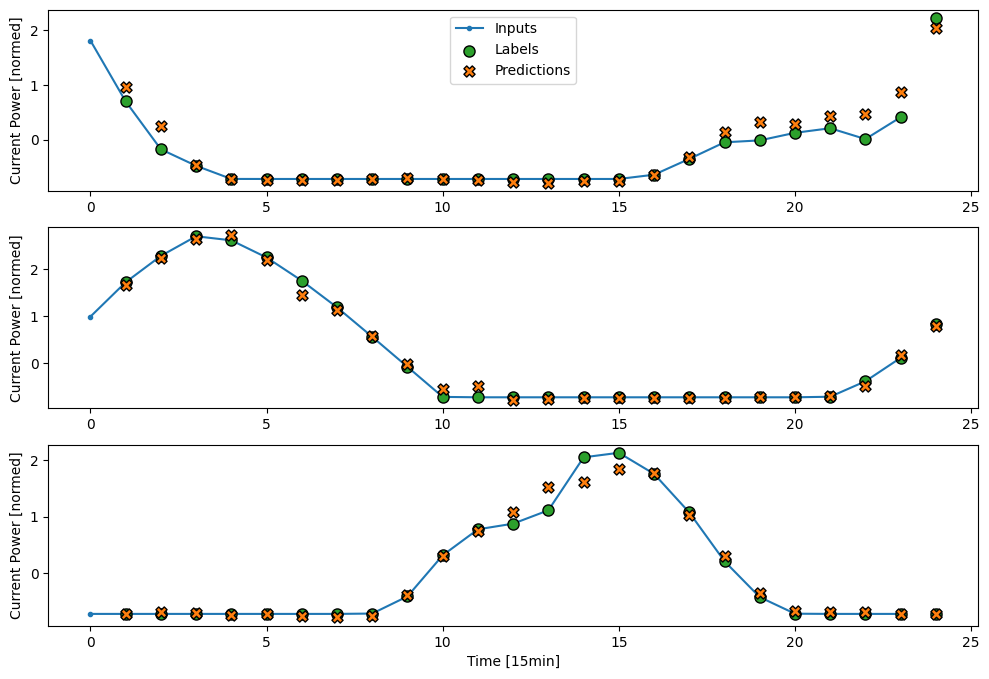

In [63]:
wide_window.plot(lstm_model)

In [64]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [65]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val, return_dict=True)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0, return_dict=True)
print()

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0761 - mean_absolute_error: 0.1470

CPU times: total: 4min 12s
Wall time: 1min 34s


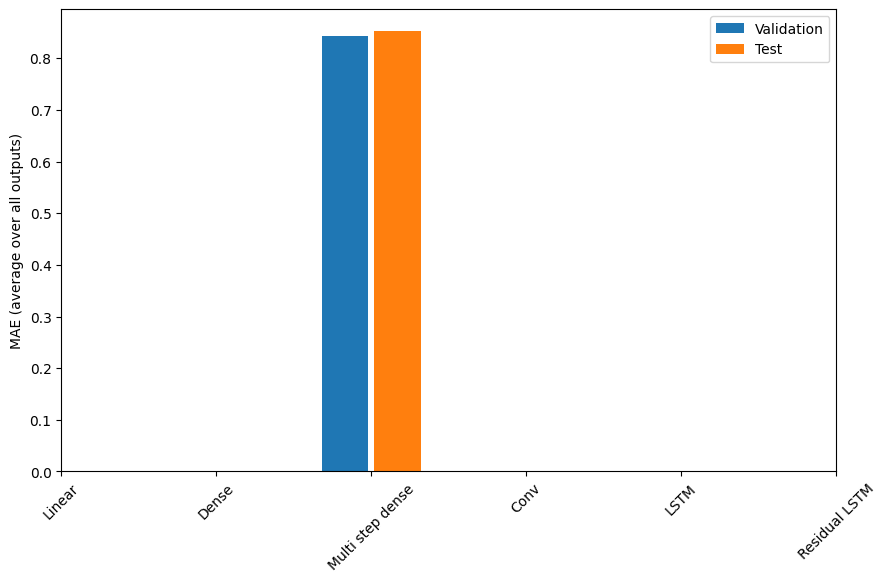

In [56]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in val_performance.values()]
test_mae = [v[metric_name] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()